In [10]:
import json
import numpy as np
import pandas as pd

In [11]:
file_path = 'comment_20240626225604.jsonl'
df = pd.read_json(file_path, lines=True)

contents = df['content'].tolist()

In [12]:
stop_words = []
with open('cn_stopwords.txt', 'r', encoding='utf-8') as f:
    for line in f:
        stop_words.append(line.strip())

In [13]:
text = ' '.join(contents)

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba

jieba.add_word("捞女")
jieba.add_word("恋爱脑")

In [15]:
import re

large_text = text
pattern = r'#.*?#'
cleaned_text = re.sub(pattern, '', large_text)

pattern_urls = r'http[s]?://\S+'
cleaned_text = re.sub(pattern_urls, '', cleaned_text)

pattern_reply = r'回复.*?:'
cleaned_text = re.sub(pattern_reply, '', cleaned_text)

keywords_to_remove = ["胖猫", "谭竹", "跳江", "回复", "知道", "事情", "[允悲]", "[苦涩]", 
                      "[泪]", "肥猫", "[微笑]", "[裂开]", "[doge]", "图片评论", "微博", "[笑cry]", "转发微博", "tz",
                      "[ok]", "[鲜花]", "重庆", "热度", "[抱抱]", "理解", "感觉", "聊天记录", "确实", "反正"]
for keyword in keywords_to_remove:
    cleaned_text = cleaned_text.replace(keyword, '')

for keyword in stop_words:
    cleaned_text = cleaned_text.replace(keyword, '')


In [16]:
words = jieba.lcut(cleaned_text)
# 只保留二字以上词语
filtered_words = [word for word in words if len(word) > 1]
filtered_text = ' '.join(filtered_words)

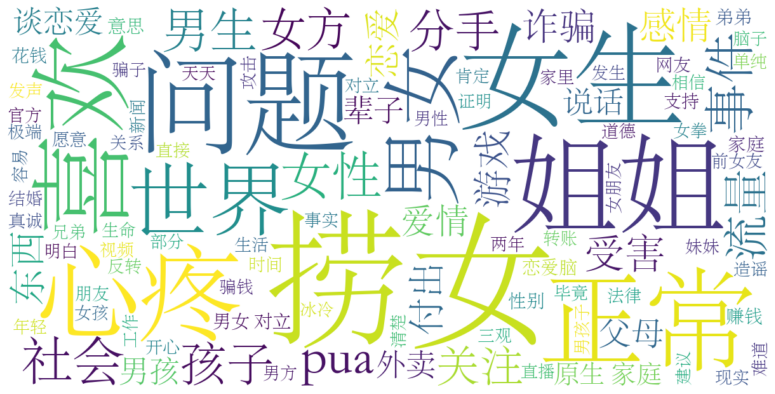

In [17]:
font_path = "C:\Windows\Fonts\STSONG.TTF"

wordcloud = WordCloud(width=1200, height=600, background_color='white', font_path=font_path, max_words=100).generate(filtered_text)
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [18]:
word_frequencies = wordcloud.words_
for word, freq in word_frequencies.items():
    print(f'{word}: {freq}')

捞女: 1.0
女生: 0.5616438356164384
问题: 0.5296803652968036
正常: 0.5114155251141552
姐姐: 0.5068493150684932
心疼: 0.45662100456621
喜欢: 0.4520547945205479
世界: 0.4429223744292237
男女: 0.4429223744292237
社会: 0.410958904109589
pua: 0.4063926940639269
女性: 0.4063926940639269
事件: 0.4063926940639269
男生: 0.3926940639269406
孩子: 0.3835616438356164
女方: 0.365296803652968
分手: 0.365296803652968
流量: 0.3607305936073059
关注: 0.3561643835616438
受害: 0.3561643835616438
游戏: 0.3287671232876712
诈骗: 0.3242009132420091
东西: 0.3242009132420091
感情: 0.3150684931506849
付出: 0.3150684931506849
恋爱: 0.2968036529680365
爱情: 0.2922374429223744
父母: 0.2876712328767123
谈恋爱: 0.2831050228310502
说话: 0.2785388127853881
外卖: 0.2785388127853881
辈子: 0.273972602739726
男孩: 0.2694063926940639
原生 家庭: 0.2694063926940639
男女 对立: 0.2648401826484018
赚钱: 0.2602739726027397
恋爱脑: 0.2602739726027397
家庭: 0.2557077625570776
弟弟: 0.2511415525114155
性别: 0.2465753424657534
意思: 0.2420091324200913
花钱: 0.2328767123287671
网友: 0.228310502283105
支持: 0.2237442922374429
难